In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table

import statsmodels.api as sm
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

### Problem 4:

(a) Generate two-class data with roughly non-linear separation

(b) Perform different support vector algorithms, kernel is the best


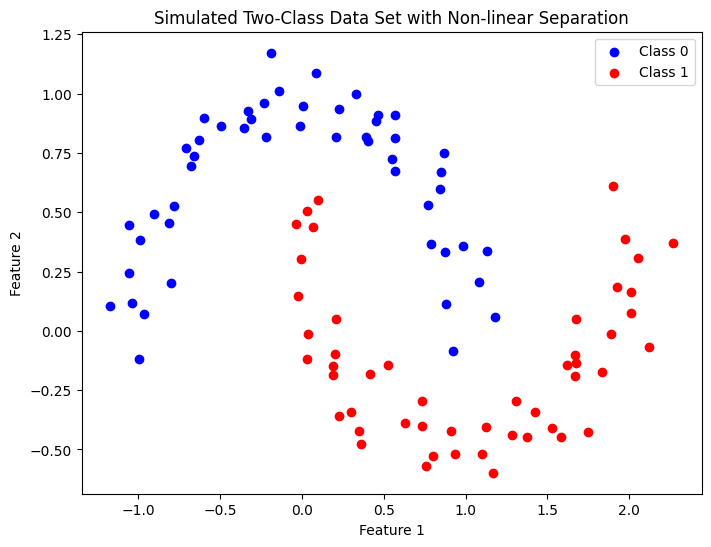

In [5]:
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1')
plt.title('Simulated Two-Class Data Set with Non-linear Separation')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

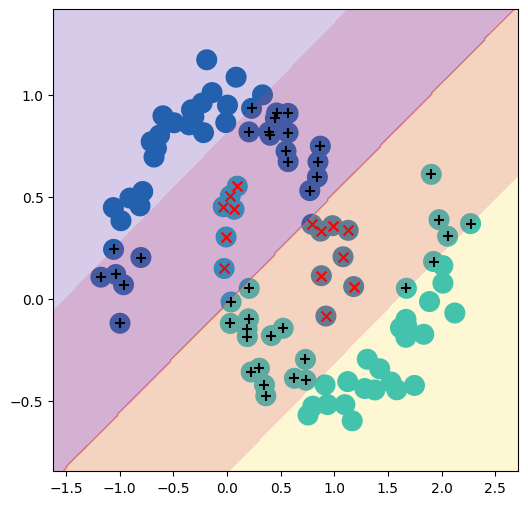

In [9]:
svm_linear = SVC(C=0.1, kernel='linear')
svm_linear.fit(X, y)

fig, ax = subplots(figsize=(6, 6))
plot_svm(X, y, svm_linear, ax=ax)

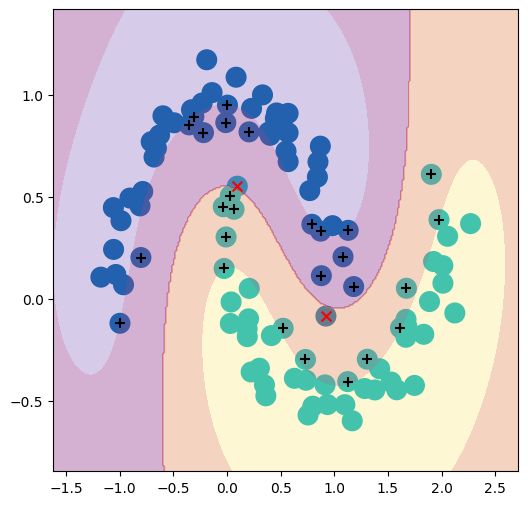

In [10]:
svm_rbf = SVC(kernel='rbf', gamma=1, C=1)
svm_rbf.fit(X, y)

fig, ax = subplots(figsize=(6,6))
plot_svm(X, y, svm_rbf, ax=ax)

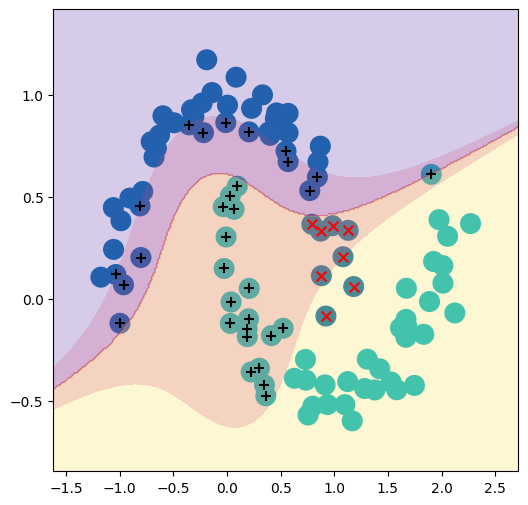

In [11]:
svm_rbf = SVC(kernel='poly', degree=3, C=1.0)
svm_rbf.fit(X, y)

fig, ax = subplots(figsize=(6,6))
plot_svm(X, y, svm_rbf, ax=ax)

### Problem 5:

(a) Generate random numbers of two classes

(b) Perform logistic regression and SVM on training data

(c) Observation: SVM has much better generalization ability

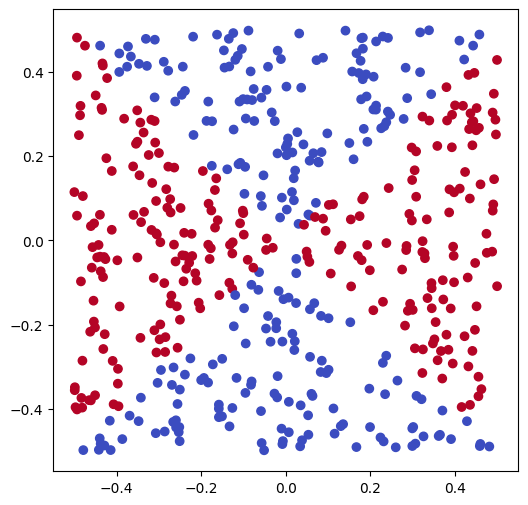

In [12]:
rng = np.random.default_rng(5)
x1 = rng.uniform(size=500)- 0.5
x2 = rng.uniform(size=500)- 0.5
y = x1**2- x2**2 > 0

fig, ax = subplots(figsize=(6,6))
ax.scatter(x1, x2, c=y, cmap=cm.coolwarm)

In [17]:
X = np.column_stack((x1, x2))
model = sm.GLM(y, X, family=sm.families.Binomial())
result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  500
Model:                            GLM   Df Residuals:                      498
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -346.39
Date:                Thu, 08 Aug 2024   Deviance:                       692.77
Time:                        11:46:11   Pearson chi2:                     500.
No. Iterations:                     3   Pseudo R-squ. (CS):          0.0006069
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1698      0.307     -0.553      0.580      -0.772       0.432
x2             0.0891      0.306      0.291      0.771      -0.511       0.689
==============================================================================
"""

In [18]:
probs = result.predict(X)
y_pred = (probs >= 0.5).astype(int)

confusion_table(y_pred, y)

Truth,False,True
Predicted,,
False,113,116
True,134,137


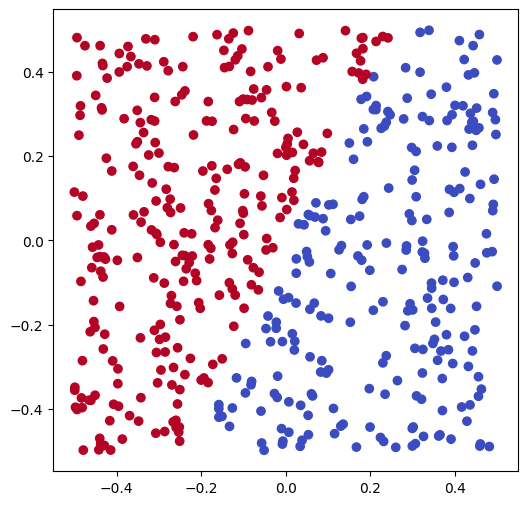

In [19]:
fig, ax = subplots(figsize=(6,6))
ax.scatter(x1, x2, c=y_pred, cmap=cm.coolwarm)

In [38]:
x1_square = x1 ** 2
x1_cross_x2 = x1 * x2
x2_square = x2 ** 2

X_new = np.column_stack((x1_square, x1_cross_x2, x2_square))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
model = sm.GLM(y_train, X_train, family=sm.families.Binomial())
result = model.fit()
probs = result.predict(X_test)
y_pred = (probs >= 0.5).astype(int)

confusion_table(y_pred, y_test)


Truth,False,True
Predicted,,
False,23,29
True,26,22


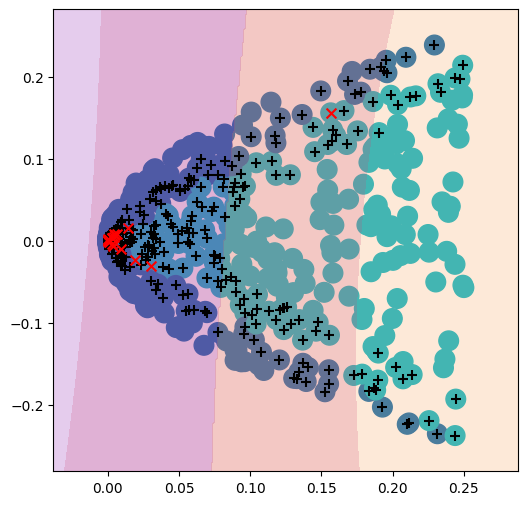

In [43]:
svm_rbf = SVC(kernel='rbf', gamma=1, C=1)
svm_rbf.fit(X_new, y)

fig, ax = subplots(figsize=(6,6))
plot_svm(X_new, y, svm_rbf, ax=ax)

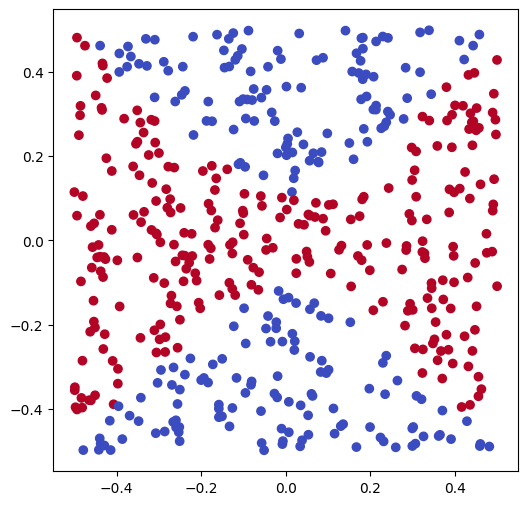

In [44]:
y_pred = svm_rbf.predict(X_new)
fig, ax = subplots(figsize=(6,6))
ax.scatter(x1, x2, c=y_pred, cmap=cm.coolwarm)

In [45]:
svm_rbf = SVC(kernel='rbf', gamma=1, C=1)
svm_rbf.fit(X_train, y_train)

y_pred = svm_rbf.predict(X_test)
confusion_table(y_pred, y_test)

Truth,False,True
Predicted,,
False,41,0
True,8,51


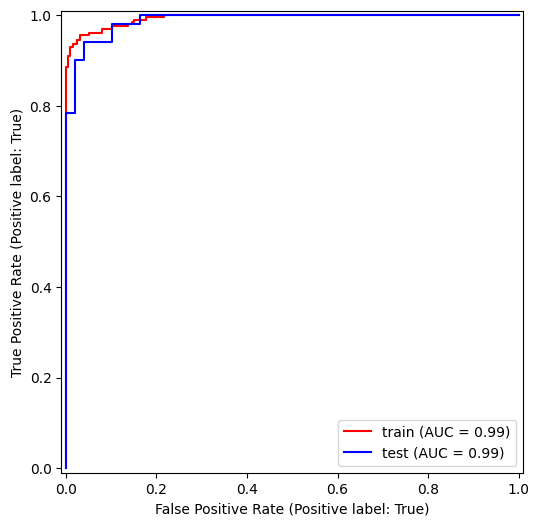

In [51]:
roc_curve = RocCurveDisplay.from_estimator 
fig, ax = subplots(figsize=(6,6))

roc_curve(svm_rbf, X_train, y_train, name='train', color='r', ax=ax)
roc_curve(svm_rbf, X_test, y_test, name='test', color='b', ax=ax)